In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
import numpy as np
import seaborn as sns
from matplotlib import cm
from astropy.table import Table
import astropy.io as asio
from astropy.io import fits
import scipy.stats as sps

In [2]:
filename = "JINGLE_hierarchical_dust_June19.csv"
dfJingle = pd.read_csv(filename)

tmpstring = ""
numlist = []

for i in range(len(dfJingle[" Name "])):
    tmpstring = dfJingle[" Name "][i]
    numlist.append(int(tmpstring[6:]))
    
dfJingle["Jing ID"] = numlist
dfJingle["BDec"] = np.nan
dfJingle["BDecerr"] = np.nan
dfJingle["Zeze"] = np.nan
dfJingle["AGNCLASS"] = np.nan
dfJingle["HA SNR"] = np.nan
dfJingle["HB SNR"] = np.nan
dfJingle["Incl"] = np.nan
dfJingle["LogSFR"] = np.nan
dfJingle["LogSFR_err"] = np.nan
dfJingle["LogSTAR"] = np.nan
dfJingle["LogSTAR_err"] = np.nan

print(dfJingle.columns.values)

['# ID ' ' Name ' 'logM SMBB ' ' low err logM ' ' up err logM ' 'T SMBB '
 ' low err T' ' up err T' ' beta SMBB ' ' low err beta ' ' up err  '
 'Jing ID' 'BDec' 'BDecerr' 'Zeze' 'AGNCLASS' 'HA SNR' 'HB SNR' 'Incl'
 'LogSFR' 'LogSFR_err' 'LogSTAR' 'LogSTAR_err']


In [3]:
sdssfits_image_filename = 'SDSS_DR14Query_EmissionLines.fits'

sdssfitstab = Table.read(sdssfits_image_filename, format='fits')
sdssfitsdf = sdssfitstab.to_pandas() # This one uses specObjID

# print("\n",sdssfitsdf["COL0"])

sdssfitsdf["Bdec"] = sdssfitsdf["FLUX_HA_6562"]/sdssfitsdf["FLUX_HB_4861"]
sdssfitsdf["HA SNR"] = sdssfitsdf["FLUX_HA_6562"]/sdssfitsdf["FLUX_HA_6562_ERR"]
sdssfitsdf["HB SNR"] = sdssfitsdf["FLUX_HB_4861"]/sdssfitsdf["FLUX_HB_4861_ERR"]
sdssfitsdf["Bdec_err"] = sdssfitsdf["Bdec"]*np.sqrt((sdssfitsdf["FLUX_HA_6562_ERR"]/sdssfitsdf["FLUX_HA_6562"])**2+(sdssfitsdf["FLUX_HB_4861_ERR"]/sdssfitsdf["FLUX_HB_4861"])**2)

# print(sdssfitsdf["COL0"])

newtmp = ""
sdssjingIDList = []

for i in range(len(sdssfitsdf["COL0"])):
    newtmp = sdssfitsdf["COL0"][i]
    sdssjingIDList.append(int(newtmp[6:]))
    
sdssfitsdf["JingID"] = sdssjingIDList

print(sdssfitsdf.columns.values)

# print(sdssfitsdf["Bdec_err"])

['COL0' 'OBJID' 'RA' 'DEC' 'RUN' 'RERUN' 'CAMCOL' 'FIELD' 'TYPE'
 'PETRORAD_R' 'PETROR50_R' 'PETROR50_Z' 'PETROR90_R' 'EXPAB_R' 'SPECOBJID'
 'PLATE' 'MJD' 'FIBERID' 'Z' 'BPT' 'SIGMASTARS' 'SIGMASTARSERR'
 'FLUX_HB_4861' 'FLUX_HB_4861_ERR' 'FLUX_OIII_5006' 'FLUX_OIII_5006_ERR'
 'FLUX_HA_6562' 'FLUX_HA_6562_ERR' 'FLUX_NII_6583' 'FLUX_NII_6583_ERR'
 'Bdec' 'HA SNR' 'HB SNR' 'Bdec_err' 'JingID']


In [4]:
jingmdrname = "JINGLE_master.fits"

jingmdrfitstab = Table.read(jingmdrname, format='fits')
jingmdrdf = jingmdrfitstab.to_pandas() # This one uses SPECOBJID

print(jingmdrdf.columns.values)

['SDSS9' 'JINGLEID' 'IDNUM' 'SDSSID' 'OBJID' 'SPECOBJID' 'PLATE' 'MJD'
 'FIBERID' 'RA' 'DEC' 'Z' 'Z_ERR' 'DL' 'AGNCLASS' 'N2HA' 'O3HB'
 'Z_PP04_N2' 'Z_PP04_O3N2' 'Z_MZR' 'LOGMSTAR' 'LOGMSTAR_MAGPHYS'
 'LOGMSTAR_MAGPHYS_ERR' 'LOGMSTAR_GRASIL' 'LOGMSTAR_WISE'
 'LOGMSTAR_WISE_ERR' 'LOGMSTAR_CHANG' 'LOGMSTAR_CHANG_ERR'
 'LOGMSTAR_MPAJHU' 'LOGMSTAR_MPAJHU_ERR' 'LOGMSTAR_BC03'
 'LOGMSTAR_BC03_ERR' 'LOGMUST' 'CINDEX' 'AXISRATIO' 'INCL' 'PETRORAD_KPC'
 'PETROR50_KPC' 'RE_R' 'LOGSFR_MPAJHU' 'LOGSFR_MPAJHU_ERR' 'LOGSFR_CHANG'
 'LOGSFR_CHANG_ERR' 'LOGSFR_IRNUV' 'LOGSFR_IRNUV_ERR' 'LOGSFR_IRFUV'
 'LOGSFR_IRFUV_ERR' 'LOGSFR_MAGPHYS' 'LOGSFR_MAGPHYS_ERR' 'LOGSFR_GRASIL'
 'LOGSFR_NUVCE01' 'LOGSFR_NUVCE01_ERR' 'LOGSFR_NUVJRM' 'LOGSFR_NUVJRM_ERR'
 'LOGSFR_FUVCE01' 'LOGSFR_FUVCE01_ERR' 'LOGSFR_FUVJRM' 'LOGSFR_FUVJRM_ERR'
 'AIRX' 'FUVK' 'LOGL12UM' 'LOGMHALO_TEMPEL14' 'GROUPRANK_TEMPEL14'
 'GROUPCLASS' 'MORPH_ZOO' 'MORPH_JINGLE' 'MORPH_TEMPEL14' 'DETFLAG_850'
 'F850' 'F850ERR' 'SN850' 'F850_CORR' 'F850ERR

In [5]:
count = 0

for i in range(int(len(sdssfitsdf["JingID"]))):
    for j in range(int(len(dfJingle["Jing ID"]))):
        if(dfJingle["Jing ID"][j]==sdssfitsdf["JingID"][i]):
            dfJingle["BDec"][j] = sdssfitsdf["Bdec"][i]
            dfJingle["BDecerr"][j] = sdssfitsdf["Bdec_err"][i]
            dfJingle["HA SNR"][j] = sdssfitsdf["HA SNR"][i]
            dfJingle["HB SNR"][j] = sdssfitsdf["HB SNR"][i]

            
for i in range(len(jingmdrdf["AGNCLASS"])):
    for j in range(len(dfJingle["Jing ID"])):
        if (dfJingle["Jing ID"][j] == jingmdrdf["IDNUM"][i]): 
            dfJingle["AGNCLASS"][j] = jingmdrdf["AGNCLASS"][i]
            dfJingle["Incl"][j] = jingmdrdf["INCL"][i]
            dfJingle["LogSFR"][j] = jingmdrdf["LOGSFR_MAGPHYS"][i]
            dfJingle["LogSFR_err"][j] = jingmdrdf["LOGSFR_MAGPHYS_ERR"][i]
            dfJingle["LogSTAR"][j] = jingmdrdf["LOGMSTAR_MAGPHYS"][i]
            dfJingle["LogSTAR_err"][j] = jingmdrdf["LOGMSTAR_MAGPHYS_ERR"][i]


# print(len(dfJingle["AGNCLASS"]),len(sdssfitsdf["Bdec"]),len(dfJingle))

# print((magphyserrlist),len(sdssfitsdf))

/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is try

In [6]:
dfJingle["LogBDec"] = np.log10(dfJingle["BDec"])
dfJingle["LogBDecerr"] = (dfJingle["BDecerr"])/(dfJingle["BDec"]*np.log(10))
# print(dfJingle["LogBDecerr"])

In [7]:
for i in range(len(dfJingle)):
    for j in range(len(jingmdrdf)):
        if (dfJingle["Jing ID"][i]==jingmdrdf["IDNUM"][j]):
                dfJingle["Zeze"][i]=jingmdrdf["Z"][j]

/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Data pipeline

In [8]:
# Removing outliers

count = 0

signoiselim = 5

listlogM = []
listlogMlowerr = []
listlogMuperr = []
listAGNClass = []
listBDec = []
listBDecerr = []
listinc = []
AGNLabels = []
listLogSFR = []
listLogSFRerr = []
listLogStar = []
listLogStarerr = []

for i in range(len(dfJingle["LogBDec"])): # Removing galaxies with S/N above S/N limits set above
    if dfJingle["HA SNR"][i]>signoiselim and dfJingle["HB SNR"][i]>signoiselim and dfJingle["HB SNR"][i]!=np.nan and dfJingle["HA SNR"][i]!=np.nan:
        listlogM.append(dfJingle["logM SMBB "][i])
        listlogMlowerr.append(dfJingle[" low err logM "][i])
        listlogMuperr.append(dfJingle[" up err logM "][i])
        listAGNClass.append(dfJingle["AGNCLASS"][i])
        listBDec.append(dfJingle["LogBDec"][i])
        listBDecerr.append(dfJingle["LogBDecerr"][i])
        listinc.append(dfJingle["Incl"][i])
        listLogSFR.append(dfJingle["LogSFR"][i])
        listLogSFRerr.append(dfJingle["LogSFR_err"][i])
        listLogStar.append(dfJingle["LogSTAR"][i])
        listLogStarerr.append(dfJingle["LogSTAR_err"][i])
        
        
        if dfJingle["AGNCLASS"][i]==-1:
            AGNLabels.append("Undetermined")
        elif dfJingle["AGNCLASS"][i]==0:
            AGNLabels.append("Inactive")
        elif dfJingle["AGNCLASS"][i]==1:
            AGNLabels.append("SFing")
        elif dfJingle["AGNCLASS"][i]==2:
            AGNLabels.append("Composite")
        elif dfJingle["AGNCLASS"][i]==3:
            AGNLabels.append("AGN")
        elif dfJingle["AGNCLASS"][i]==4:
            AGNLabels.append("Seyfert")


            
SFLogM = []
SFLogMlowerr = []
SFLogMuperr = []
SFBdec = []
SFBdecerr = []
SFinc = []
SFLogSFR = []
SFLogSFRerr = []
SFLogStar = []
SFLogStarerr = []

for i in range(len(listAGNClass)): # Removing non SFing galaxies
    if listAGNClass[i]==1:
        SFLogMlowerr.append(listlogMlowerr[i])
        SFLogMuperr.append(listlogMuperr[i])
        SFLogM.append(listlogM[i])
        SFBdec.append(listBDec[i])
        SFBdecerr.append(listBDecerr[i])
        SFinc.append(listinc[i])
        SFLogSFR.append(listLogSFR[i])
        SFLogSFRerr.append(listLogSFRerr[i])
        SFLogStar.append(listLogStar[i])
        SFLogStarerr.append(listLogStarerr[i])
        
colors = ["red","blue","green","orange","purple","black"]
legendlabels = ["Undetermined", "Inactive", "SFing", "Composite", "AGN", "Seyfert"]
colorlist = []
for i in range(len(listAGNClass)):
    colorlist.append(colors[int(listAGNClass[i])+1])
    
# Next step is to break up each data point to get the legend on the graph

for i in range(len(AGNLabels)):
    colorlist.append(colors[int(listAGNClass[i]+1)])

In [9]:
# For the BDec vs. Dustmass Graphs

sfPearsonRhoBvD, sfPearsonPValBvD = sps.pearsonr(SFBdec,SFLogM) # Gets more correlated as approaches abs(1)
sfSpearmanRhoBvD, sfSpearmanPValBvD = sps.spearmanr(SFBdec,SFLogM) # More monotonically correlated as it gets closer to 1
# print(sfSpearmanRhoBvD,sfSpearmanPValBvD, sfPearsonRhoBvD,sfPearsonPValBvD)

sfPearsonRhoSvS, sfPearsonPValSvS = sps.pearsonr(SFLogStar,SFLogSFR)
sfSpearmanRhoSvS, sfSpearmanPValSvS = sps.spearmanr(SFLogStar,SFLogSFR)

### Plots

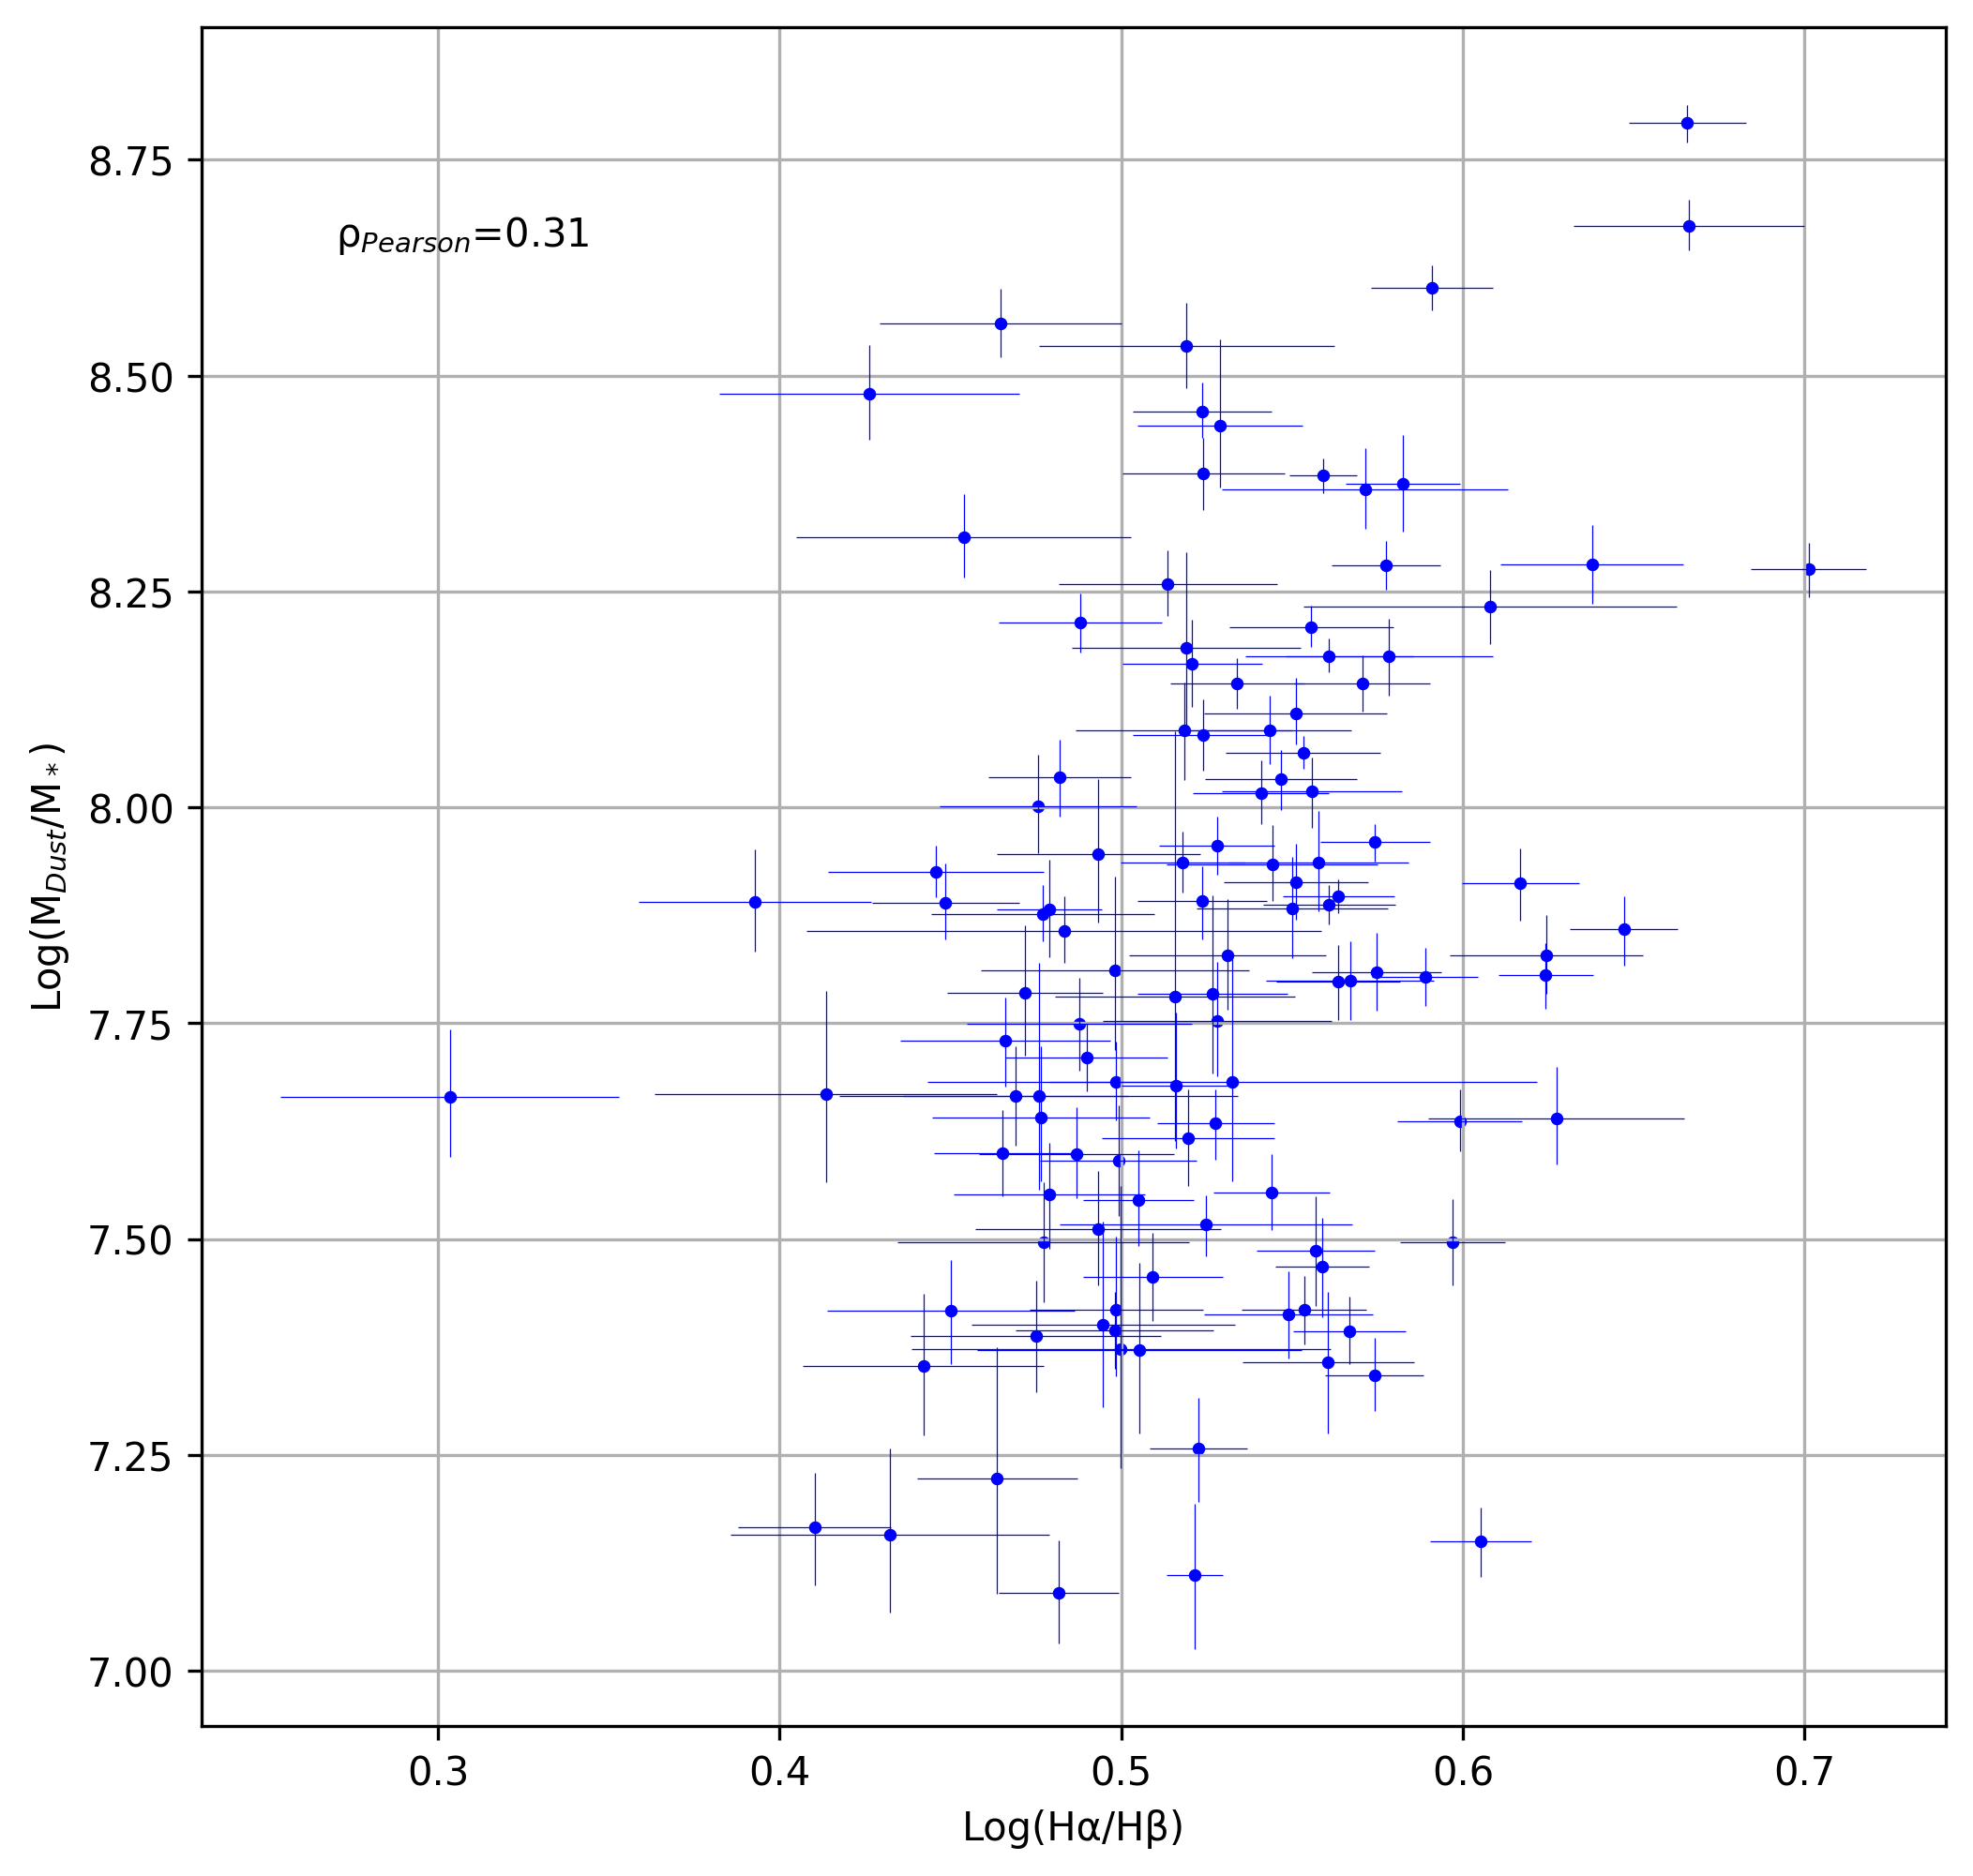

In [29]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8,8), dpi=300, facecolor='w', edgecolor='k')

plt.errorbar(SFBdec,SFLogM, yerr = [SFLogMlowerr,SFLogMuperr],xerr = SFBdecerr, linestyle = "none",elinewidth = 0.3, c = "blue")
plt.scatter(SFBdec,SFLogM,c="blue",s=5)
plt.ylabel("Log(M$_{Dust}$/M$_*$)")
plt.xlabel("Log(H\u03B1/H\u03B2)")
plt.grid()
# plt.legend((colors),(legendlabels))
plt.text(.27,8.65,"\u03C1$_{Pearson}$=%.2f" % sfPearsonRhoBvD)
# plt.text(0.3,8.6,"\u03C1$_{Spearman}$=%.2f" % sfSpearmanRhoBvD)
# ax = plt.axes()
# ax.set_aspect('equal')

plt.grid(True)
plt.savefig("SFGalaxies_BDecvsDustmass.png",dpi=300)

plt.show()

Plot of SF galaxies Balmer decrement vs dust mass and determined spearman and pearson correlation coefficients
Not very correlated

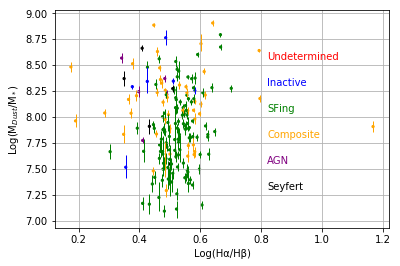

In [11]:
plt.errorbar(listBDec,listlogM , yerr = [listlogMlowerr,listlogMuperr], linestyle = "none",elinewidth = 1, c = colorlist)
plt.scatter(listBDec,listlogM,c=colorlist,s=5)


plt.ylabel("Log(M$_{Dust}$/M$_*$)")
plt.xlabel("Log(H\u03B1/H\u03B2)")
plt.grid()

for i in range(len(legendlabels)):
    plt.text(0.82,8.55-i*0.25,legendlabels[i],color=colors[i])

plt.savefig("AllGalaxies_BDecvsDustmass.png",dpi=300)

plt.show()

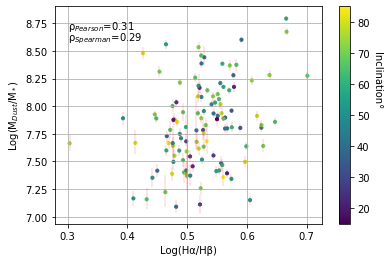

In [15]:
plt.scatter(SFBdec,SFLogM,c=SFinc,s=10)
plt.errorbar(SFBdec,SFLogM, yerr = [SFLogMlowerr,SFLogMuperr], linestyle = "none",elinewidth = 0.2,c="red")

plt.ylabel("Log(M$_{Dust}$/M$_*$)")
plt.xlabel("Log(H\u03B1/H\u03B2)")
plt.grid()

plt.colorbar()

# plt.xlim(0.2,0.9)

plt.text(0.81,8,"Inclination\u00b0",rotation = -90)
plt.text(0.3,8.7,"\u03C1$_{Pearson}$=%.2f" % sfPearsonRhoBvD)
plt.text(0.3,8.6,"\u03C1$_{Spearman}$=%.2f" % sfSpearmanRhoBvD)

plt.savefig("SFGalaxies_BDecvsDustmass_colorinclination.png",dpi=300)

plt.show()

Plot of SF galaxies Balmer decrement vs dust mass and determined spearman and pearson correlation coefficients
Not very correlated
Now colorized by inclination

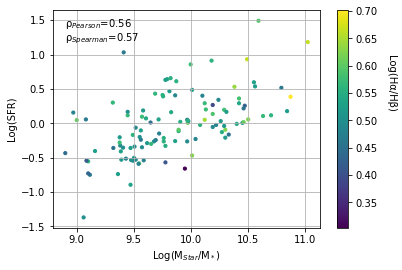

In [14]:
plt.scatter(SFLogStar,SFLogSFR,c = SFBdec,s=10)
# plt.errorbar(SFLogStar,SFLogSFR,yerr = SFLogSFRerr, xerr = SFLogSFRerr, linestyle="none",elinewidth = 0.4,c="red")

plt.xlabel("Log(M$_{Star}$/M$_*$)")
plt.ylabel("Log(SFR)")
plt.grid()
plt.colorbar()
plt.text(11.7,0.2,"Log(H\u03B1/H\u03B2)",rotation = -90)

plt.text(8.9,1.4,"\u03C1$_{Pearson}$=%.2f" % sfPearsonRhoSvS)
plt.text(8.9,1.2,"\u03C1$_{Spearman}$=%.2f" % sfSpearmanRhoSvS)

plt.savefig("SFGalaxies_StellarmassvsSFR_colorLogBDec.png",dpi=300)

plt.show()

Stellar Mass vs SFR vs B Dec, slightly more correlated

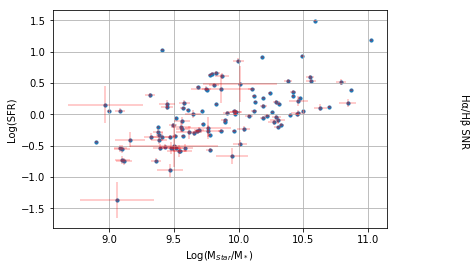

In [14]:
# NEED TO FIGURE OUT WHICH SNR TO USE TO COLOR CODE AND IF IM ADDING IN QUADRATURE OR NOT, THIS GRAPH IS V POOPY

plt.scatter(SFLogStar,SFLogSFR,s=10)
plt.errorbar(SFLogStar,SFLogSFR,yerr = SFLogSFRerr, xerr = SFLogSFRerr, linestyle="none",elinewidth = 0.4,c="red")

plt.xlabel("Log(M$_{Star}$/M$_*$)")
plt.ylabel("Log(SFR)")
plt.grid()
# plt.colorbar()
# plt.text(11.7,0.2,"H\u03B1/H\u03B2 SNR",rotation = -90)

plt.savefig("SFGalaxies_StellarmassvsSFR_colorBDecSNR.png",dpi=300)

plt.show()

### Introducing xCOLD GASS data

In [10]:
coldfilename = "xCOLDGASS_all.fits"

coldfitstab = Table.read(coldfilename, format='fits')
coldfitsdf = coldfitstab.to_pandas()
coldfitsdf["LOGLCO"] = np.log10(coldfitsdf["LCO"])
coldfitsdf["LOGLCO_COR"] = np.log10(coldfitsdf["LCO_COR"])
coldfitsdf["LOGLCO_ERR"] = coldfitsdf["LCO_ERR"]/(np.log(10)*coldfitsdf["LCO"])
coldfitsdf["LOGLCO_COR_ERR"] = coldfitsdf["LCO_COR_ERR"]/(np.log(10)*coldfitsdf["LCO_COR"])

print(coldfitsdf.columns.values)

filtBalmer = []
filtBalmer_err = []
filtInc = []
filtLCO = []
filtLCO_COR = []
filtLCO_err = []
filtLCO_COR_err = []
filtAGNCLASS = []
filtCORFrac = []
filtCORFrac_err = []

count=0

for i in range(len(coldfitsdf["FLAG_CO"])): # Removing galaxies that did not detect CO Line transition
    if (coldfitsdf["FLAG_CO"][i]==1):
        filtBalmer.append(coldfitsdf["BALMER"][i])
        filtBalmer_err.append(coldfitsdf["BALMER_ERR"][i])
        filtInc.append(coldfitsdf["INCL"][i])
        filtLCO.append((coldfitsdf["LOGLCO"][i]))
        filtLCO_COR.append((coldfitsdf["LOGLCO_COR"][i]))
        filtAGNCLASS.append(coldfitsdf["AGNCLASS"][i])
        filtLCO_err.append(coldfitsdf["LOGLCO_ERR"][i])
        filtLCO_COR_err.append(coldfitsdf["LOGLCO_COR_ERR"][i])
        filtCORFrac.append(coldfitsdf["LOGLCO_COR"][i]/coldfitsdf["LOGLCO"][i])
        a=coldfitsdf["LOGLCO_COR"][i]/coldfitsdf["LOGLCO"][i]
        filtCORFrac_err.append(a*np.sqrt((coldfitsdf["LOGLCO_COR_ERR"][i]/coldfitsdf["LOGLCO_COR"][i])**2+(coldfitsdf["LOGLCO_ERR"][i]/coldfitsdf["LOGLCO"][i])**2))
        
        count+=1
    else:
        print(coldfitsdf["SFR_BEST"][i])

['ID' 'SAMPLE' 'AGCNR' 'SDSS' 'OBJID' 'SPECOBJID' 'PLATEID' 'MJD'
 'FIBERID' 'RA' 'DEC' 'Z_SDSS' 'LUMDIST' 'INCL' 'NUVR_GEXT' 'D25_G'
 'R50_R' 'R50KPC' 'R50_Z' 'R50_NUV' 'R50_NUV_ERR' 'R50_SFR' 'R50_SFR_ERR'
 'MASS' 'MASS_ERR' 'MUST' 'CINDX' 'SFR_SDSS' 'SFR_SED' 'SFR_BEST'
 'SFR_ERR' 'SFR_CASE' 'SFR_IR' 'SFR_IR_ERR' 'SSFR' 'DELTAMS_P10'
 'DELTAMS_S16' 'DELTAMS_W12' 'DELTAMS_W14' 'D4000' 'N2HA' 'O3HB' 'BALMER'
 'BALMER_ERR' 'AGNCLASS' 'Z_PP04_N2' 'Z_PP04_O3N2' 'Z_MZR' 'Z_FIBER'
 'HISRC' 'ZHI' 'W50COR' 'LOGMHI' 'LOGMHIMS' 'HICONF' 'GROUPID'
 'ENVIRONMENT' 'NGROUP' 'LOGMHALO' 'LOGRNORM' 'FLAG_CO' 'XCO' 'XCO_G12'
 'XCO_A16' 'XCO_A16_ERR' 'ICO' 'ICO_ERR' 'ICO_COR' 'ICO_COR_ERR' 'F_RECOV'
 'LCO' 'LCO_ERR' 'LCO_COR' 'LCO_COR_ERR' 'RMS_CO' 'SN_CO' 'WCO' 'WCO_FLAG'
 'Z_CO' 'WCO_TFR' 'WCO_TFR_ERR' 'WCO_TFR_FLAG' 'LOGMH2' 'LOGMH2_ERR'
 'LIMLOGMH2' 'MH2_ERR' 'LOGMH2MS' 'LOGRMOL' 'FLAGRMOL' 'FLAG_CO21' 'ICO21'
 'ICO21_ERR' 'ICO21_COR' 'LCO21' 'LCO21_ERR' 'LCO21_COR' 'RMS_CO21'
 'SN_CO21' 'WCO21' 'W

In [8]:
print(coldfitsdf["LOGLCO"])

0      7.990160
1      7.984976
2      8.030444
3      8.045000
4      7.998182
5      8.341011
6      8.446288
7      8.039276
8      7.938062
9      8.059038
10     7.846274
11     8.740760
12     8.291603
13     8.672707
14     8.279985
15     8.191234
16     9.301465
17     7.817960
18     8.087569
19     8.196997
20     7.990777
21     7.832732
22     7.970871
23     9.347354
24     8.010321
25     7.799674
26     7.906899
27     8.943026
28     8.740900
29     7.683456
         ...   
502    7.484952
503    7.418224
504    7.226736
505    7.712699
506    7.434095
507    7.778677
508    7.315659
509    6.732889
510    7.683225
511    7.341292
512    7.394274
513    8.283130
514    7.666964
515    7.813963
516    7.191126
517    7.127345
518    7.521377
519    7.351553
520    7.427058
521    7.712333
522    7.543030
523    7.459372
524    7.744605
525    7.235870
526    7.068739
527    8.474590
528    7.937132
529    7.689295
530    7.997317
531    7.909225
Name: LOGLCO, Length: 53

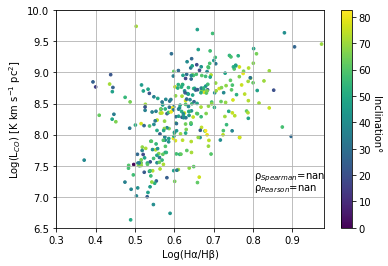

In [16]:
plt.scatter(filtBalmer,filtLCO,c=filtInc,s=7)

sfPearsonRhoFBvLCO, sfPearsonPValFBvLCO = sps.pearsonr(filtBalmer,filtLCO)
sfSpearmanRhoFBvLCO, sfSpearmanPValFBvLCO = sps.spearmanr(filtBalmer,filtLCO)

plt.colorbar()
plt.grid()
plt.text(1.1,8.5,"Inclination\u00b0",rotation = -90)
plt.text(0.802,7.1,"\u03C1$_{Pearson}$=%.2f" % sfPearsonRhoFBvLCO)
plt.text(0.802,7.3,"\u03C1$_{Spearman}$=%.2f" % sfSpearmanRhoFBvLCO)
plt.xlim(0.3,0.98)
plt.ylim(6.5,10)

plt.xlabel("Log(H\u03B1/H\u03B2)")
plt.ylabel("Log(L$_{CO}$) [K km s$^{-1}$ pc$^2$]")

plt.savefig("xCOLD_BDecvsLCO_colorinc.png",dpi=300)

plt.show()

Balmer Decrement vs. Log(LCO) vs. Inclination for SF xCold GASS galaxies

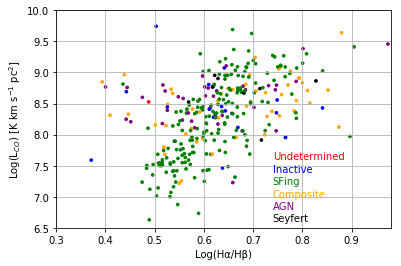

In [17]:
filtcolors = []
for i in range(len(filtAGNCLASS)):
    filtcolors.append(colors[int(filtAGNCLASS[i])+1])
plt.scatter(filtBalmer,filtLCO,c=filtcolors,s=7)

for i in range(len(legendlabels)):
    plt.text(0.74,7.6-i*0.2,legendlabels[i],color=colors[i])

plt.grid()
plt.xlim(0.3,0.98)
plt.ylim(6.5,10)

plt.xlabel("Log(H\u03B1/H\u03B2)")
plt.ylabel("Log(L$_{CO}$) [K km s$^{-1}$ pc$^2$]")

plt.savefig("xCOLD_BDecvsLCO_colorAGN.png",dpi=300)

plt.show()

Balmer Decrement vs. Log(LCO) vs. Inclination for all xCold GASS galaxies

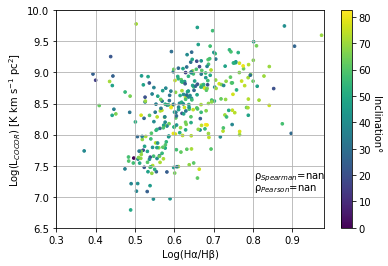

In [18]:
plt.scatter(filtBalmer,filtLCO_COR,c=filtInc,s=7)


sfPearsonRhoFBvLCO_COR, sfPearsonPValFBvLCO_COR = sps.pearsonr(filtBalmer,filtLCO_COR)
sfSpearmanRhoFBvLCO_COR, sfSpearmanPValFBvLCO_COR = sps.spearmanr(filtBalmer,filtLCO_COR)

plt.colorbar()
plt.grid()
plt.text(1.1,8.5,"Inclination\u00b0",rotation = -90)
plt.text(0.802,7.1,"\u03C1$_{Pearson}$=%.2f" % sfPearsonRhoFBvLCO_COR)
plt.text(0.802,7.3,"\u03C1$_{Spearman}$=%.2f" % sfSpearmanRhoFBvLCO_COR)
plt.xlim(0.3,0.98)
plt.ylim(6.5,10)

plt.xlabel("Log(H\u03B1/H\u03B2)")
plt.ylabel("Log(L$_{CO COR}$) [K km s$^{-1}$ pc$^2$]")

plt.savefig("xCOLD_BDecvsLCOCOR_colorinc.png",dpi=300)

plt.show()

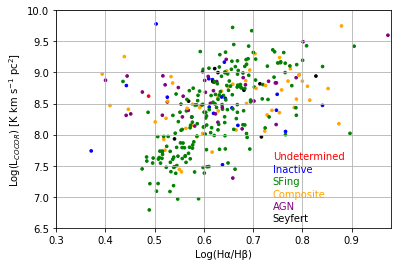

In [19]:
plt.scatter(filtBalmer,filtLCO_COR,c=filtcolors,s=7)

for i in range(len(legendlabels)):
    plt.text(0.74,7.6-i*0.2,legendlabels[i],color=colors[i])

plt.grid()
plt.xlim(0.3,0.98)
plt.ylim(6.5,10)

plt.xlabel("Log(H\u03B1/H\u03B2)")
plt.ylabel("Log(L$_{CO COR}$) [K km s$^{-1}$ pc$^2$]")

plt.savefig("xCOLD_BDecvsLCOCOR_colorAGN.png",dpi=300)

plt.show()

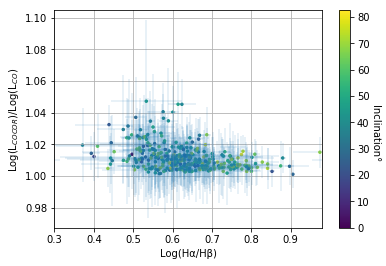

In [20]:
plt.scatter(filtBalmer,filtCORFrac,c=filtInc,s=6)
plt.errorbar(filtBalmer,filtCORFrac,xerr = filtBalmer_err,yerr= filtCORFrac_err,linestyle="none",elinewidth = 0.2)

plt.colorbar()
plt.grid()
plt.text(1.1,1.04,"Inclination\u00b0",rotation = -90)

plt.xlabel("Log(H\u03B1/H\u03B2)")
plt.ylabel("Log(L$_{CO COR}$)/Log(L$_{CO}$) ")
plt.xlim(0.3,0.98)

plt.savefig("xCOLD_BDecvsCORFrac_colorInc_wErrBars.png",dpi=300)

plt.show()

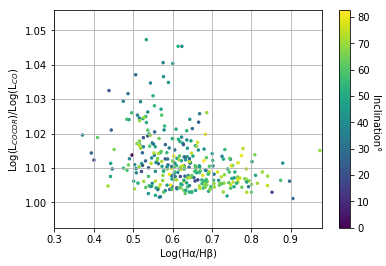

In [21]:
plt.scatter(filtBalmer,filtCORFrac,c=filtInc,s=6)

plt.colorbar()
plt.grid()
plt.text(1.1,1.029,"Inclination\u00b0",rotation = -90)

plt.xlabel("Log(H\u03B1/H\u03B2)")
plt.ylabel("Log(L$_{CO COR}$)/Log(L$_{CO}$) ")
plt.xlim(0.3,0.98)

plt.savefig("xCOLD_BDecvsCORFrac_colorInc_noErrBars.png",dpi=300)

plt.show()

In [22]:
print(np.average(SFBdec))
print(np.average(filtBalmer))

0.5261551491503328
nan


In [81]:
newfilename = "280_hier_normal_hrs_filter_fit_with_jingle_separate_ms_fluxes_v13.csv"
newdfHRS = pd.read_csv(newfilename)

bosfilename = "table6_boselli_2015_fluxes.csv"
bosdf = pd.read_csv(bosfilename)

print(bosdf.columns.values)
print(newdfHRS.columns.values)

newdfHRS = newdfHRS[2:]

bosdf["logM Dust"] = np.nan
bosdf["low err logM Dust"] = np.nan
bosdf["up err logM Dust"] = np.nan

for i in range(len(bosdf["# HRS index"])):
    for j in range(2,len(newdfHRS["#"])+2):
        if bosdf["# HRS index"][i]==int(newdfHRS["#"][j]):
            bosdf["logM Dust"][i] = newdfHRS["logM SMBB "][j]
            bosdf["low err logM Dust"][i] = newdfHRS[" low err logM "][j]
            bosdf["up err logM Dust"][i] = newdfHRS[" up err logM "][j]

['# HRS index' 'OII' 'Hbeta' 'OIII' 'Halpha' 'NII' 'SII' 'SII.1' 'S/N(Ha)'
 'SN(Hbeta)' 'C(Hbeta)' 'sigma[C(Hbeta)]']
['#' 'Name ' 'logM SMBB ' ' low err logM ' ' up err logM ' 'T SMBB '
 ' low err T' ' up err T' ' beta SMBB ' ' low err beta ' ' up err  '
 ' log like ']


/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [93]:
for i in range(len(bosdf["Hbeta"])):
    if bosdf["S/N(Ha)"][i]!="-":
        bosdf["S/N(Ha)"][i] = float(bosdf["S/N(Ha)"][i])
    else:
        bosdf["S/N(Ha)"][i] = np.nan
    if bosdf["SN(Hbeta)"][i]!= "-":
        bosdf["SN(Hbeta)"][i] = float(bosdf["SN(Hbeta)"][i])
    else:
        bosdf["SN(Hbeta)"][i] = np.nan
    if bosdf["Halpha"][i]!="-":
        bosdf["Halpha"][i] = float(bosdf["Halpha"][i])
    else:
        bosdf["Halpha"][i] = np.nan
    if bosdf["Hbeta"][i] != "-":
        bosdf["Hbeta"][i] = float(bosdf["Hbeta"][i])
    else:
        bosdf["Hbeta"][i] = np.nan


/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by Interactive

In [ ]:
### End of transmission - July 31st. Hopefullys